In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(dataset := pd.read_csv("fredsz.csv"))

,Distancia(cm),TempoExp1(s),TempoExp2(s),TempoExp3(s)
0,0,0.00000,0.00000,0.00000
1,10,0.16800,0.12125,0.15900
2,20,0.18025,0.17700,0.18550
3,30,0.22500,0.23000,0.24800
4,40,0.27450,0.25650,0.29375
5,50,0.29225,0.29450,0.29650
6,60,0.30975,0.30975,0.31025
7,70,0.33650,0.34525,0.35350
8,80,0.37200,0.38000,0.39000
9,90,0.42400,0.43425,0.42500


In [3]:
std = []
for i in range(16):
    std.append(np.std([dataset.iloc[i,1], dataset.iloc[i,2], dataset.iloc[i,3]]))
dataset['std-erro'] = std

In [4]:
dist = list(dataset['Distancia(cm)']/100)
dist.reverse()
dataset['Distancia(cm)'] = dist
dataset

,Distancia(cm),TempoExp1(s),TempoExp2(s),TempoExp3(s),std-erro
0,1.5,0.00000,0.00000,0.00000,0.000000
1,1.4,0.16800,0.12125,0.15900,0.020253
2,1.3,0.18025,0.17700,0.18550,0.003502
3,1.2,0.22500,0.23000,0.24800,0.009877
4,1.1,0.27450,0.25650,0.29375,0.015210
5,1.0,0.29225,0.29450,0.29650,0.001736
6,0.9,0.30975,0.30975,0.31025,0.000236
7,0.8,0.33650,0.34525,0.35350,0.006941
8,0.7,0.37200,0.38000,0.39000,0.007364
9,0.6,0.42400,0.43425,0.42500,0.004614


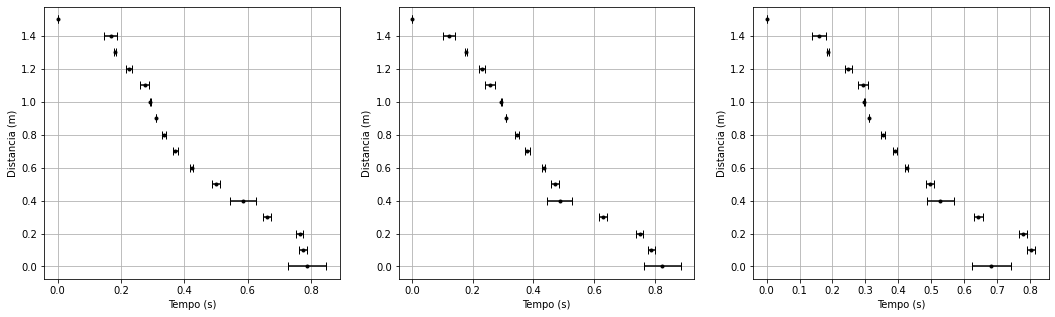

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
Y = dataset.iloc[0:,0].values

for i in range(3):
    X = dataset.iloc[0:, i+1].values

    ax[i].errorbar(X, Y, c='k', fmt=".", xerr=dataset.iloc[0:,4], capsize=4)
    ax[i].grid()
    ax[i].set_xlabel("Tempo (s)")
    ax[i].set_ylabel("Distancia (m)")

$$
S = S_0 + V_0t + \frac{at^2}{2} \\
S = \frac{at^2}{2}\\
$$
Portanto se fittarmos a linha $S$ em relação a $t^2$ acharemos $\frac{a}{2}$

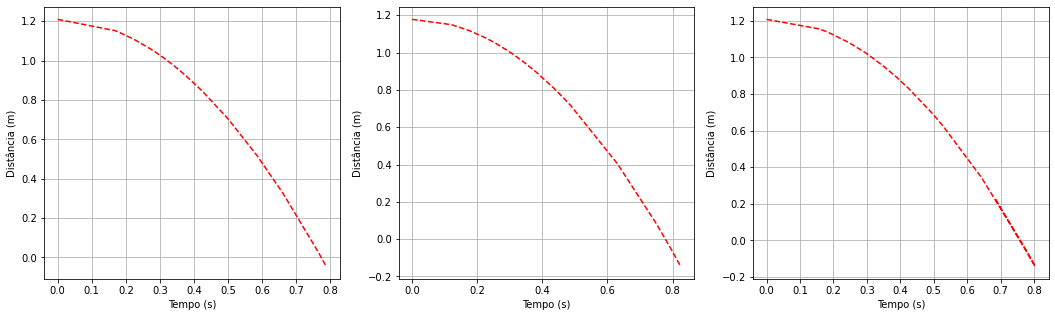

In [6]:
from sklearn.linear_model import LinearRegression

fig2, ax2 = plt.subplots(1, 3, figsize=(18, 5))
acs = []

Y = np.array(Y).reshape(-1,1)
for i in range(3):
    X = np.array(dataset.iloc[0:, i+1]).reshape(-1,1)
    X2 = X**2
    
    model = LinearRegression()
    model.fit(X2, Y)
    
    acs.append((model.coef_*2)[0][0])
    
    ax2[i].plot(X, model.predict(X2), '--',c="r")
    ax2[i].grid()
    ax2[i].set_xlabel("Tempo (s)")
    ax2[i].set_ylabel("Distância (m)")

In [7]:
acstd = np.std(acs)

In [8]:
ac = {
    "acs" : acs,
    "acstd" : acstd,
    "acmean" : np.mean(acs),
    "acmeanerr" : np.std(acs)/np.sqrt(len(acs))
}

In [9]:
ac

{'acs': [-4.049176429954917, -3.8917160340360786, -4.182364808715349],
 'acstd': 0.11879470187508395,
 'acmean': -4.041085757568781,
 'acmeanerr': 0.06858615310588106}

with open("INFO.txt", 'w') as file:
    for item in ac.items():
        file.write(str(item[0]) + " " + str(item[1]) + "\n")

from matplotlib.backends import backend_pdf
with backend_pdf.PdfPages("graphs.pdf") as pdf:
    pdf.savefig(fig)
    pdf.savefig(fig2)

dataset.to_csv("EDITED.csv", index=0)

-2.0245882149774586 -> [1.20970915]
-1.9458580170180393 -> [1.17801269]
-2.0911824043576743 -> [1.20800006]


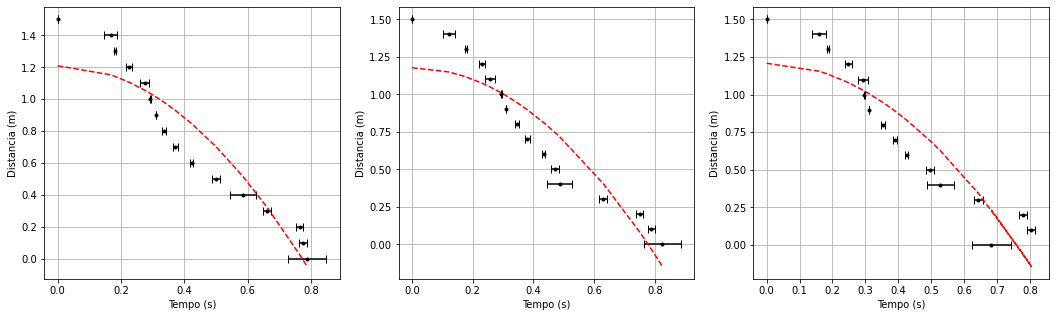

In [11]:
fig3, ax3 = plt.subplots(1, 3, figsize=(18, 5))
Y = np.array(Y).reshape(-1,1)
for i in range(3):
    X = np.array(dataset.iloc[0:, i+1]).reshape(-1,1)
    
    X2 = X**2
    
    model = LinearRegression()
    model.fit(X2, Y)
    print(f"{model.coef_[0][0]} -> {model.intercept_}")
    
    ax3[i].errorbar(X, Y, c='k', fmt=".", xerr=dataset.iloc[0:,4], capsize=4)
    ax3[i].plot(X, model.predict(X2), '--',c="r")
    ax3[i].grid()
    ax3[i].set_xlabel("Tempo (s)")
    ax3[i].set_ylabel("Distancia (m)")

fig3.savefig("Comb.pdf")